## Trabajo de Fin de Máster: Predicción Inteligente de Precios en Airbnb Madrid
### Autora: Katherine López Ramírez
### Fecha de entrega: [12/09/2025]

# Cargar datos y Exploración

Cargamos las dos fuentes de Inside Airbnb: 
https://insideairbnb.com/get-the-data.html
- listings.csv.gz: metadatos del anuncio (características del alojamiento y del host).
- calendar.csv: disponibilidad y precio por día.

In [85]:
import pandas as pd

# Carga de archivos
listings = pd.read_csv("../datos_brutos/listings.csv.gz", low_memory=False)
calendar = pd.read_csv("../datos_brutos/calendar.csv", low_memory=False)

# Primeras filas
print("LISTADOS:")
display(listings.head())

print("CALENDARIO:")
display(calendar.head())

LISTADOS:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73


CALENDARIO:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,21853,2025-03-11,f,$28.00,NaN,4.0,40.0
1,21853,2025-03-12,f,$28.00,NaN,4.0,40.0
2,21853,2025-03-13,f,$28.00,NaN,4.0,40.0
3,21853,2025-03-14,f,$28.00,NaN,4.0,40.0
4,21853,2025-03-15,f,$28.00,NaN,4.0,40.0


In [86]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Analisis y exploración de datos

In [87]:
# Info general
print("INFO LISTADOS:")
listings.info()

print("\nINFO CALENDARIO:")
calendar.info()

# Columnas disponibles
print("\nColumnas LISTADOS:")
print(listings.columns)

print("\nColumnas CALENDARIO:")
print(calendar.columns)

INFO LISTADOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       

In [88]:
# Estadísticas básicas de precios
print("Precio en listados:")
print(listings["price"].head())

# Cantidad de barrios únicos
print("\nBarrios únicos:")
print(listings["neighbourhood"].unique())

Precio en listados:
0    $29.00
1       NaN
2       NaN
3       NaN
4    $77.00
Name: price, dtype: object

Barrios únicos:
['Madrid, Spain' nan 'Madrid, Community of Madrid, Spain'
 'Madrid, Comunidad de Madrid, Spain'
 'Madrid, Comunidad de  Madrid, Spain' 'Madrid , Madrid, Spain'
 'Madrid, Comunity of Madrid, Spain' 'Madrid, Co, Spain'
 'Madrid, madrid, Spain' 'madrid, Comunidad de Madrid, Spain'
 'Madrid, MADRID, Spain' 'Madrid, Comunidad de Madrid, ES, Madrid, Spain'
 'Pozuelo de Alarcón, Comunidad de Madrid, Spain'
 'Madrid, Palos de Moguer , Spain'
 'Madrid, Comunidad de Madrid , Atocha, Spain'
 'Madrid, La Latina/Palacio , Madrid, Spain' 'Madrid, Salamanca, Spain'
 'Las Rozas, Comunidad de Madrid, Spain' 'Madrid Center, Madrid, Spain'
 'MADRID, Spain' 'Chueca, Madrid, Spain' 'Salamanca, Madrid, Spain'
 'Madrid, SPAIN  Madrid Madrid, Spain'
 'Madrid , Comunidad de Madrid, Spain'
 'Madrid, Spain Madrid Madrid, Spain'
 'Madrid, centro , Comunidad de Madrid. Zona centro., Spain' 'S


### Resumen exploración inicial
- Datos disponibles:
- listings: 25.288 anuncios con 79 variables sobre alojamientos y anfitriones.
- calendar: 9,2 millones de registros diarios con precios y disponibilidad.
- Variables clave:
- Identificador (id, listing_id), ubicación (neighbourhood_cleansed, coordenadas), tipo de alojamiento, capacidad, baños, reseñas y precios.

### Problemas detectados:
- Precios en formato texto con $.
- Barrios con nombres inconsistentes → usaremos neighbourhood_cleansed.
- Valores nulos en varias columnas (bathrooms, bedrooms, review_scores).
- Outliers en precios (miles de euros en algunos casos).

# Limpieza Listings

In [89]:
columnas = [
    # Identificador
    'id',

    # Ubicación
    'latitude', 'longitude', 'neighbourhood_cleansed',

    # Alojamiento
    'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms',

    # Reseñas
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'number_of_reviews',

    # Anfitrión
    'host_is_superhost', 'host_response_time', 'host_response_rate',
    'host_acceptance_rate', 'host_identity_verified',

    # Reservas y disponibilidad
    'availability_365', 'minimum_nights', 'instant_bookable',

    # Precio (target)
    'price'
]

listings = listings[columnas]

In [90]:
# revisar valores nulos en otras columnas
print(listings.isnull().sum())

id                                0
latitude                          0
longitude                         0
neighbourhood_cleansed            0
room_type                         0
accommodates                      0
bedrooms                       2551
beds                           6026
bathrooms                      6018
review_scores_rating           5197
review_scores_accuracy         5197
review_scores_cleanliness      5198
review_scores_checkin          5198
review_scores_communication    5197
review_scores_location         5200
review_scores_value            5201
number_of_reviews                 0
host_is_superhost               792
host_response_time             5293
host_response_rate             5293
host_acceptance_rate           4048
host_identity_verified           19
availability_365                  0
minimum_nights                    0
instant_bookable                  0
price                          6014
dtype: int64


In [91]:
# Eliminar símbolo $ y convertir a float
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Eliminar valores nulos en el target
listings = listings.dropna(subset=['price'])

# Verificar nulos en variables predictoras
nulos = listings.isnull().sum()
print(nulos[nulos > 0])

# Verificar
listings['price'].describe()

bedrooms                         24
beds                             19
bathrooms                        14
review_scores_rating           3178
review_scores_accuracy         3178
review_scores_cleanliness      3179
review_scores_checkin          3179
review_scores_communication    3178
review_scores_location         3178
review_scores_value            3178
host_is_superhost               692
host_response_time             1332
host_response_rate             1332
host_acceptance_rate            791
host_identity_verified           10
dtype: int64


count    19274.000000
mean       138.965082
std        433.623184
min          8.000000
25%         65.000000
50%         97.000000
75%        142.000000
max      23124.000000
Name: price, dtype: float64

### Limpieza inicial de listings

Objetivo: reducir el dataset a las variables más relevantes para la predicción de precios y limpiar los valores nulos/inconsistentes.

1.	Selección de columnas clave
Se mantuvieron únicamente las variables más útiles para el modelo:
- Identificador: id
- Ubicación: latitude, longitude, neighbourhood_cleansed
- Alojamiento: room_type, accommodates, bedrooms, beds, bathrooms
- Reseñas: métricas de calidad (review_scores_*) y number_of_reviews
- Anfitrión: información básica sobre el perfil (host_is_superhost, host_response_time, etc.)
- Disponibilidad y reservas: availability_365, minimum_nights, instant_bookable
- Precio: price (variable objetivo).
Esto reduce ruido y simplifica el dataset.

2. Limpieza de la columna price
- Se eliminaron símbolos $ y comas.
- Se convirtió a tipo numérico (float).
- Se eliminaron las filas con NaN en price, ya que el modelo necesita siempre un valor objetivo para entrenar.

3. Valores nulos en otras variables
- Persisten nulos en bedrooms, beds, bathrooms, reseñas y variables de anfitrión.
- Decisión: eliminar filas sin reseñas (review_scores_*), porque un alojamiento sin evaluaciones probablemente no aporta información de valor (puede estar vacío, mal ubicado o ser nuevo).

In [92]:
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

# Eliminamos filas que tengan nulos en cualquiera de las columnas de review
listings = listings.dropna(subset=review_cols)

# Verificar nulos en variables predictoras
nulos = listings.isnull().sum()
print(nulos[nulos > 0])

bedrooms                   11
beds                       15
bathrooms                  10
host_is_superhost         648
host_response_time        889
host_response_rate        889
host_acceptance_rate      482
host_identity_verified     10
dtype: int64


Eliminas nulos en variables estructurales del alojamiento

- Son variables básicas; imputarlas podría introducir ruido si no hay criterio claro. Eliminar aquí es razonable.

In [93]:
# bedrooms, beds, bathrooms_text: eliminar nulos
listings = listings.dropna(subset=['bedrooms', 'beds', 'bathrooms'])

In [94]:
# Rellenar nulos con 'f'. Mapear a valores numéricos: 't' → 1, 'f' → 0
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('f').map({'t': 1, 'f': 0})

In [95]:
# Eliminar el símbolo '%' y convertir a float entre 0 y 1
# Rellenar nulos con la media de cada una
# Quitar el símbolo de porcentaje si aún existe y convertir a float
for col in ['host_response_rate', 'host_acceptance_rate']:
    listings[col] = listings[col].str.rstrip('%').astype(float) / 100
    listings[col] = listings[col].fillna(listings[col].mean())

In [96]:
# Diccionario de mapeo ordinal
response_time_map = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

# Mapear y rellenar nulos con 5, es decir, los que no responden
listings['host_response_time'] = listings['host_response_time'].map(response_time_map).fillna(5).astype(int)

In [97]:
# Rellenar nulos con 'f' y convertir a binario verdadero: 1 falso: 0
listings['host_identity_verified'] = listings['host_identity_verified'].fillna('f')
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0})

In [98]:
# Reserva inmediata verdadero: 1 falso: 0
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0})

In [99]:
# Verificar nulos en variables predictoras
nulos = listings.isnull().sum()
print(nulos[nulos > 0])

Series([], dtype: int64)


In [100]:
print("Filas:", listings.shape[0])
print("Columnas:", listings.shape[1])

Filas: 16059
Columnas: 26


In [101]:
listings.dtypes

id                               int64
latitude                       float64
longitude                      float64
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bedrooms                       float64
beds                           float64
bathrooms                      float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
host_is_superhost                int64
host_response_time               int64
host_response_rate             float64
host_acceptance_rate           float64
host_identity_verified           int64
availability_365                 int64
minimum_nights                   int64
instant_bookable                 int64
price                    

In [102]:
listings

,id,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,bathrooms,review_scores_rating,...,number_of_reviews,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_identity_verified,availability_365,minimum_nights,instant_bookable,price
0,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,33,0,5,0.953563,0.00,1,233,4,0,29.0
4,62423,40.418840,-3.696550,Justicia,Private room,4,1.0,2.0,1.5,4.64,...,227,0,1,1.000000,1.00,1,298,1,0,77.0
5,70059,40.423810,-3.710380,Universidad,Entire home/apt,2,1.0,1.0,1.0,4.68,...,61,0,2,1.000000,1.00,1,54,15,0,66.0
6,70310,40.422520,-3.702500,Universidad,Entire home/apt,2,1.0,2.0,1.0,4.36,...,29,0,1,1.000000,1.00,1,289,30,0,89.0
7,72150,40.411500,-3.704490,Embajadores,Entire home/apt,6,3.0,5.0,1.0,4.61,...,126,0,1,1.000000,0.96,1,163,3,0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25130,1362294249473405797,40.403460,-3.674580,Pacífico,Entire home/apt,2,1.0,1.0,1.0,5.00,...,1,0,1,1.000000,1.00,1,18,3,1,90.0
25172,1365635357360238932,40.423077,-3.654061,Ventas,Private room,3,1.0,2.0,1.0,5.00,...,1,0,2,0.920000,0.47,1,2,1,0,57.0
25231,1366534590465861868,40.461157,-3.698250,Valdeacederas,Shared room,1,1.0,1.0,3.0,5.00,...,1,0,2,0.920000,0.67,1,362,1,1,19.0
25238,1368304377290123314,40.434096,-3.609342,Rosas,Private room,2,1.0,1.0,1.0,5.00,...,1,0,1,1.000000,1.00,1,158,1,0,53.0


In [103]:
listings.select_dtypes(include='object').nunique()

neighbourhood_cleansed    127
room_type                   4
dtype: int64

## Outliers en genereral

In [104]:
# Estadistica básicas
print(listings['price'].describe())

count    16059.000000
mean       130.012765
std        372.758390
min          8.000000
25%         66.000000
50%         96.000000
75%        139.000000
max      23124.000000
Name: price, dtype: float64


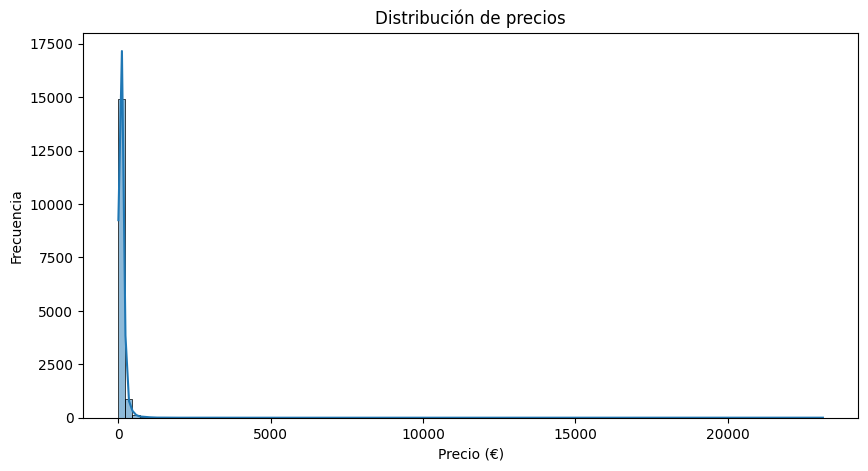

In [105]:
# Visualizar la distribución de precios
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(listings['price'], bins=100, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.show()

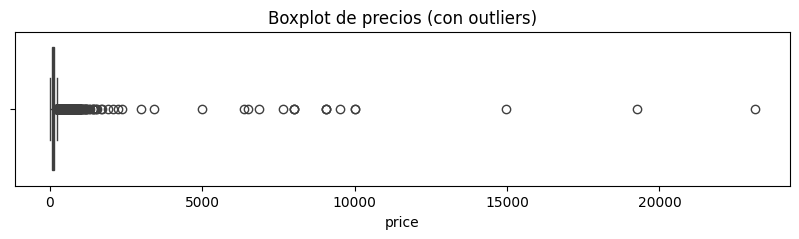

In [106]:
# Boxplot para ver outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=listings['price'])
plt.title("Boxplot de precios (con outliers)")
plt.show()

In [107]:
# Detección de outliers por IQR
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = listings[(listings['price'] >= Q1 - 1.5 * IQR) & (listings['price'] <= Q3 + 1.5 * IQR)]

print(f"Límites: {limite_inferior:.2f} - {limite_superior:.2f}")
print(f"Precios extremos detectados: {(listings['price'] > limite_superior).sum()}")

Límites: -43.50 - 248.50
Precios extremos detectados: 1035


### Análisis de outliers en precios

Una vez limpiados los datos principales, se analizó la distribución de los precios de Airbnb en Madrid.

1. Distribución general
- La mayoría de alojamientos se concentran en precios bajos (entre 50 € y 150 €).
- Sin embargo, aparecen valores extremadamente altos (más de 20.000 € por noche), que claramente no son realistas y corresponden a outliers.

2. Boxplot de precios
- El boxplot muestra que existen numerosos valores alejados de la mediana.
- Estos valores atípicos pueden distorsionar el modelo, ya que generan un rango de precios irreal.

3. Estadísticas descriptivas
- Precio mínimo: 8 €
- Precio máximo: 23.124 €
- Media: 130 €
- Mediana: 96 €
- Límite superior estadístico: 248 €
- Se identificaron 1035 precios extremos que sobrepasan los límites normales.

### Conclusión:
Estos outliers deben eliminarse para evitar que el modelo de predicción se vea afectado por valores irreales. Después de filtrarlos, se repetirá el análisis para comprobar cómo mejora la distribución.

In [108]:
df_sin_outliers

,id,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,bathrooms,review_scores_rating,...,number_of_reviews,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_identity_verified,availability_365,minimum_nights,instant_bookable,price
0,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,33,0,5,0.953563,0.00,1,233,4,0,29.0
4,62423,40.418840,-3.696550,Justicia,Private room,4,1.0,2.0,1.5,4.64,...,227,0,1,1.000000,1.00,1,298,1,0,77.0
5,70059,40.423810,-3.710380,Universidad,Entire home/apt,2,1.0,1.0,1.0,4.68,...,61,0,2,1.000000,1.00,1,54,15,0,66.0
6,70310,40.422520,-3.702500,Universidad,Entire home/apt,2,1.0,2.0,1.0,4.36,...,29,0,1,1.000000,1.00,1,289,30,0,89.0
7,72150,40.411500,-3.704490,Embajadores,Entire home/apt,6,3.0,5.0,1.0,4.61,...,126,0,1,1.000000,0.96,1,163,3,0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25130,1362294249473405797,40.403460,-3.674580,Pacífico,Entire home/apt,2,1.0,1.0,1.0,5.00,...,1,0,1,1.000000,1.00,1,18,3,1,90.0
25172,1365635357360238932,40.423077,-3.654061,Ventas,Private room,3,1.0,2.0,1.0,5.00,...,1,0,2,0.920000,0.47,1,2,1,0,57.0
25231,1366534590465861868,40.461157,-3.698250,Valdeacederas,Shared room,1,1.0,1.0,3.0,5.00,...,1,0,2,0.920000,0.67,1,362,1,1,19.0
25238,1368304377290123314,40.434096,-3.609342,Rosas,Private room,2,1.0,1.0,1.0,5.00,...,1,0,1,1.000000,1.00,1,158,1,0,53.0


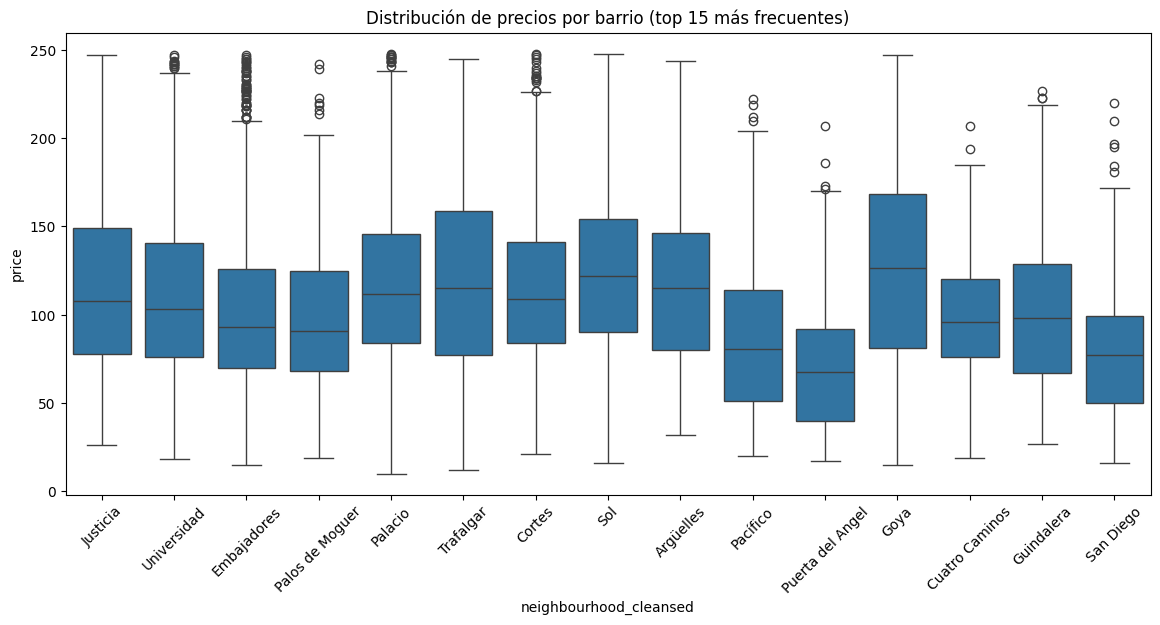

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para evitar mostrar todos los barrios, filtramos los más frecuentes
barrios_frecuentes = df_sin_outliers['neighbourhood_cleansed'].value_counts().nlargest(15).index
df_filtrado = df_sin_outliers[df_sin_outliers['neighbourhood_cleansed'].isin(barrios_frecuentes)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_filtrado)
plt.xticks(rotation=45)
plt.title("Distribución de precios por barrio (top 15 más frecuentes)")
plt.show()

### Distribución de precios por barrio (Top 15 más frecuentes)
- El gráfico muestra la variación de precios dentro de los 15 barrios con más anuncios en Airbnb Madrid.
- Cada caja (boxplot) representa:
- La línea central: mediana del precio en ese barrio.
- Los bordes de la caja: el rango intercuartílico (IQR, 25% - 75%), donde se concentra la mayoría de precios.
- Los “bigotes”: precios más extremos aún dentro de un rango aceptable.
- Los puntos sueltos: outliers (precios muy altos o bajos, poco frecuentes).

### Interpretación:
- Barrios como Goya, Sol o Trafalgar muestran precios más altos en general.
- En cambio, Pacífico, San Diego o Puerta del Ángel tienen precios más bajos y dispersión más reducida.
- Se confirma que el precio depende fuertemente del barrio, lo cual justifica usar esta variable en el modelo.

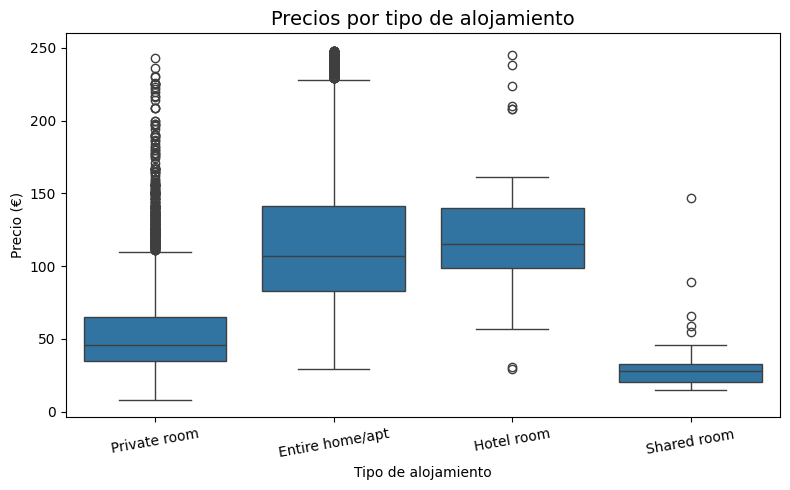

In [110]:
# Boxplot de precios por tipo de alojamiento
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=df_sin_outliers)
plt.title("Precios por tipo de alojamiento", fontsize=14)
plt.xlabel("Tipo de alojamiento")
plt.ylabel("Precio (€)")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

### Distribución de precios por tipo de alojamiento
- Aquí se comparan los precios según el tipo de habitación/anuncio:
- Private room (habitación privada): precios bajos en general, mayoría entre 30 – 60 €, pero con algunos casos de outliers altos.
- Entire home/apt (apartamento entero): precios más altos, con una mediana cerca de 100 €, y algunos outliers que superan los 200 €.
- Hotel room: precios intermedios-altos, con cierta dispersión.
- Shared room (habitación compartida): la opción más barata, con mediana alrededor de 25 €.

### Interpretación:
- Se observa un patrón lógico y esperado:
- Los alojamientos completos cuestan más.
- Las habitaciones compartidas son lo más barato.
- También hay outliers (ejemplo: habitaciones privadas con precios superiores a apartamentos enteros), lo que indica errores de carga o anuncios poco representativos.

In [111]:
import geopandas as gpd

# Cargar archivo geojson
gdf_barrios = gpd.read_file("../datos_brutos/neighbourhoods.geojson")

In [112]:
print(gdf_barrios.columns)

Index(['neighbourhood', 'neighbourhood_group', 'geometry'], dtype='object')


In [113]:
gdf_barrios

,neighbourhood,neighbourhood_group,geometry
0,Palacio,Centro,"MULTIPOLYGON (((-3.70593 40.42029, -3.70634 40..."
1,Embajadores,Centro,"MULTIPOLYGON (((-3.70393 40.41431, -3.70286 40..."
2,Cortes,Centro,"MULTIPOLYGON (((-3.69805 40.41928, -3.69654 40..."
3,Justicia,Centro,"MULTIPOLYGON (((-3.69555 40.41897, -3.69654 40..."
4,Universidad,Centro,"MULTIPOLYGON (((-3.70117 40.42133, -3.70164 40..."
...,...,...,...
123,Alameda de Osuna,Barajas,"MULTIPOLYGON (((-3.58252 40.4638, -3.58087 40...."
124,Timón,Barajas,"MULTIPOLYGON (((-3.57998 40.50158, -3.58011 40..."
125,Aeropuerto,Barajas,"MULTIPOLYGON (((-3.57795 40.51037, -3.57588 40..."
126,Casco Histórico de Barajas,Barajas,"MULTIPOLYGON (((-3.57455 40.47266, -3.57484 40..."


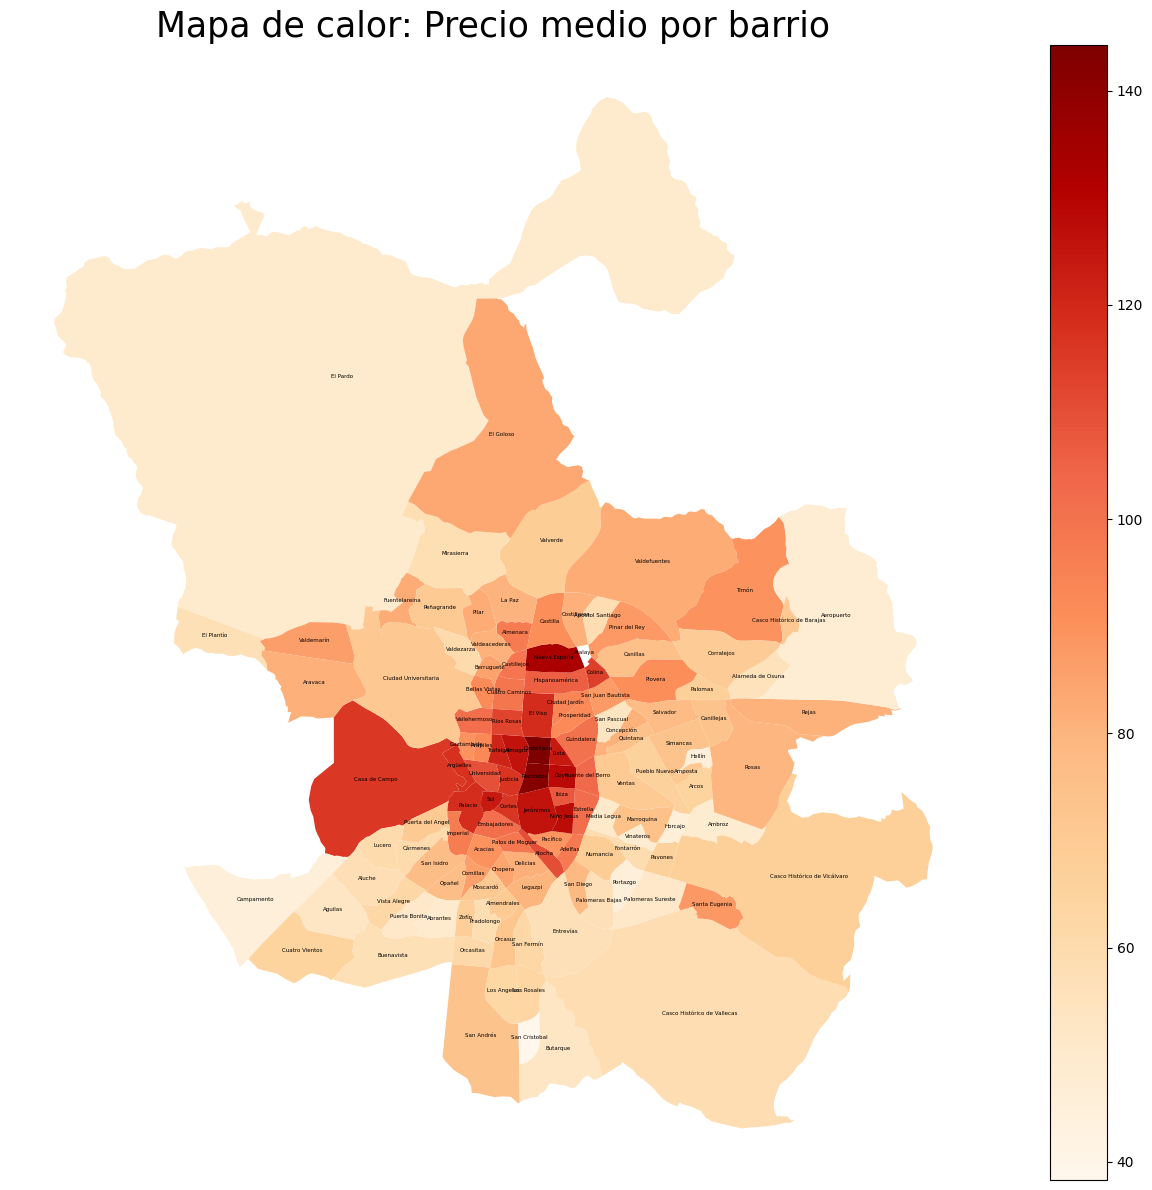

In [114]:
# Agrupar por barrio para calcular precio medio
df_precio_medio = df_sin_outliers.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Unir con el GeoDataFrame
gdf_barrios = gdf_barrios.merge(df_precio_medio, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')

# Plot
fig, ax = plt.subplots(figsize=(15, 12))
gdf_barrios.plot(column='price', cmap='OrRd', legend=True, ax=ax)

# Añadir nombres de barrios centrados
for idx, row in gdf_barrios.iterrows():
    plt.annotate(row['neighbourhood'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=4, color='black')

plt.title("Mapa de calor: Precio medio por barrio", fontsize=25)
plt.axis("off")
plt.tight_layout()
plt.show()

### Mapa de calor: Precio medio por barrio
- En el mapa se muestran los barrios de Madrid coloreados según su precio medio en Airbnb.
- La escala de colores va del beige claro (más barato) al rojo intenso (más caro).
- La barra lateral a la derecha indica la escala de precios, desde ~40 € hasta más de 140 € de promedio por noche.

### Interpretación:
- Los barrios céntricos (Centro, Justicia, Sol, Embajadores, Palacio) destacan en rojo oscuro, lo que refleja precios medios más altos. Esto coincide con la alta demanda turística y su cercanía a los principales atractivos de Madrid.
- A medida que nos alejamos hacia la periferia, los barrios muestran tonos más claros, reflejando precios más bajos.
- Este patrón confirma que la ubicación geográfica es un factor determinante en la fijación de precios de Airbnb en Madrid.

### Conclusión:
La visualización aporta una dimensión espacial al análisis, permitiendo identificar zonas premium frente a zonas más asequibles, lo cual será clave tanto para la exploración de datos como para validar la importancia de la variable neighbourhood_cleansed en el modelo predictivo.

## Limpieza Calendar

In [115]:
# 2. Convertir la columna 'date' a tipo fecha
calendar['date'] = pd.to_datetime(calendar['date'])

# 3. Crear una columna 'mes' a partir de la fecha
calendar['mes'] = calendar['date'].dt.month

# 4. Limpiar la columna 'price' para convertirla a número
calendar['price'] = calendar['price'].replace(r'[\$,]', '', regex=True).astype(float)

# 5. Calcular el precio promedio por listing_id y mes
df_precio_mensual = calendar.groupby(['listing_id', 'mes'])['price'].mean().reset_index()

# 6. Renombrar la columna para que sea más clara
df_precio_mensual.rename(columns={'price': 'precio_promedio_mensual'}, inplace=True)

# 7. Renombrar la columna para que sea más clara
df_precio_mensual.rename(columns={'listing_id': 'id'}, inplace=True)

# 8. Mostrar los primeros resultados
df_precio_mensual

,id,mes,precio_promedio_mensual
0,21853,1,28.0
1,21853,2,28.0
2,21853,3,28.0
3,21853,4,33.0
4,21853,5,33.0
...,...,...,...
303451,1369179411176424072,8,26.0
303452,1369179411176424072,9,32.0
303453,1369179411176424072,10,32.0
303454,1369179411176424072,11,28.0


## Unir los dos Data Frame

In [116]:
# Unimos por 'id'
df_merged = pd.merge(df_sin_outliers, df_precio_mensual, on='id', how='left')

# Mostramos una muestra para verificar
df_merged

,id,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,bathrooms,review_scores_rating,...,host_response_time,host_response_rate,host_acceptance_rate,host_identity_verified,availability_365,minimum_nights,instant_bookable,price,mes,precio_promedio_mensual
0,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,5,0.953563,0.00,1,233,4,0,29.0,1,28.0
1,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,5,0.953563,0.00,1,233,4,0,29.0,2,28.0
2,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,5,0.953563,0.00,1,233,4,0,29.0,3,28.0
3,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,5,0.953563,0.00,1,233,4,0,29.0,4,33.0
4,21853,40.403810,-3.741300,Cármenes,Private room,1,1.0,1.0,1.0,4.58,...,5,0.953563,0.00,1,233,4,0,29.0,5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180283,1368959297523052477,40.417039,-3.706763,Sol,Entire home/apt,3,1.0,1.0,1.0,5.00,...,2,0.930000,0.71,1,351,1,1,122.0,8,130.0
180284,1368959297523052477,40.417039,-3.706763,Sol,Entire home/apt,3,1.0,1.0,1.0,5.00,...,2,0.930000,0.71,1,351,1,1,122.0,9,160.0
180285,1368959297523052477,40.417039,-3.706763,Sol,Entire home/apt,3,1.0,1.0,1.0,5.00,...,2,0.930000,0.71,1,351,1,1,122.0,10,160.0
180286,1368959297523052477,40.417039,-3.706763,Sol,Entire home/apt,3,1.0,1.0,1.0,5.00,...,2,0.930000,0.71,1,351,1,1,122.0,11,138.0


## Eliminar Outliers por Barrios

/var/folders/bd/c6514xtd1zjgq83rf48wyhn00000gn/T/ipykernel_57187/490376447.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




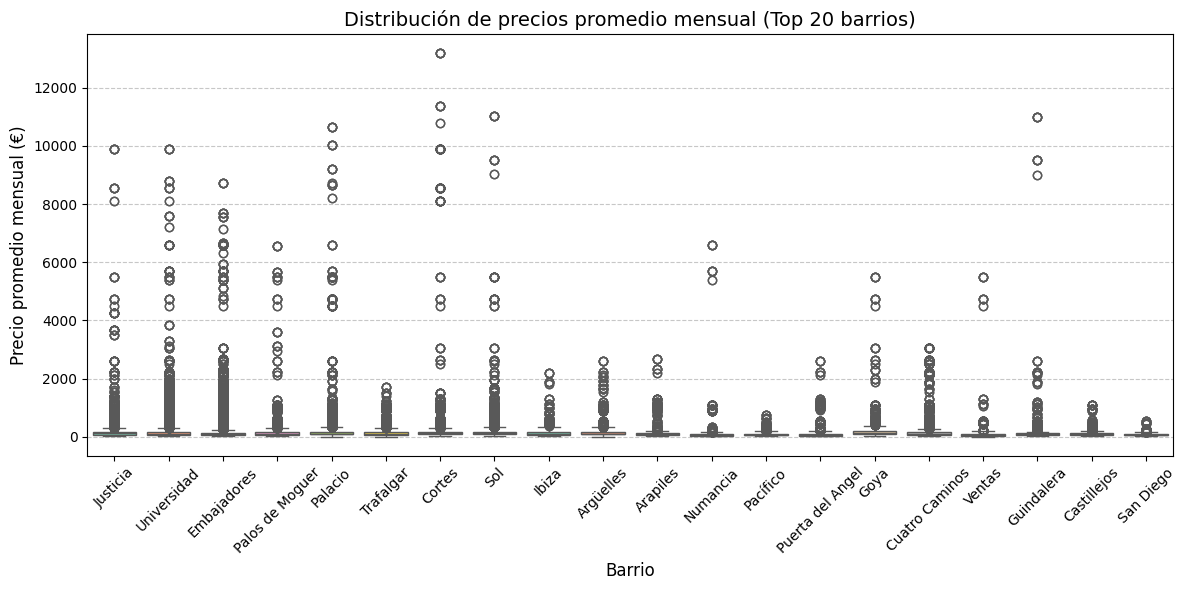

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar los 20 barrios con más registros
top_barrios = df_merged['neighbourhood_cleansed'].value_counts().head(20).index
df_top = df_merged[df_merged['neighbourhood_cleansed'].isin(top_barrios)]

# Crear boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='neighbourhood_cleansed',
    y='precio_promedio_mensual',
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title('Distribución de precios promedio mensual (Top 20 barrios)', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio promedio mensual (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Primer gráfico (sin limpiar por barrio):
- Muestra que todavía existen precios extremos, con algunos barrios alcanzando más de 10.000 €/mes, lo cual no es realista.
Esto evidencia la necesidad de detectar y eliminar outliers por barrio, porque un precio desorbitado puede distorsionar el análisis y el modelo.

In [118]:
# Crear una copia segura
df_sin_outliers = df_merged.copy()

# Inicializar un DataFrame vacío para guardar los datos limpios
df_limpio = pd.DataFrame()

# Recorrer cada barrio y aplicar el filtro IQR individualmente
for barrio in df_sin_outliers['neighbourhood_cleansed'].unique():
    barrio_df = df_sin_outliers[df_sin_outliers['neighbourhood_cleansed'] == barrio]
    
    Q1 = barrio_df['precio_promedio_mensual'].quantile(0.25)
    Q3 = barrio_df['precio_promedio_mensual'].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    barrio_df_filtrado = barrio_df[
        (barrio_df['precio_promedio_mensual'] >= limite_inferior) & 
        (barrio_df['precio_promedio_mensual'] <= limite_superior)
    ]
    
    df_limpio = pd.concat([df_limpio, barrio_df_filtrado], ignore_index=True)

# Mostrar dimensiones del nuevo DataFrame
print(f'Dimensiones después de limpiar outliers: {df_limpio.shape}')

Dimensiones después de limpiar outliers: (162859, 28)


/var/folders/bd/c6514xtd1zjgq83rf48wyhn00000gn/T/ipykernel_57187/3614480482.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




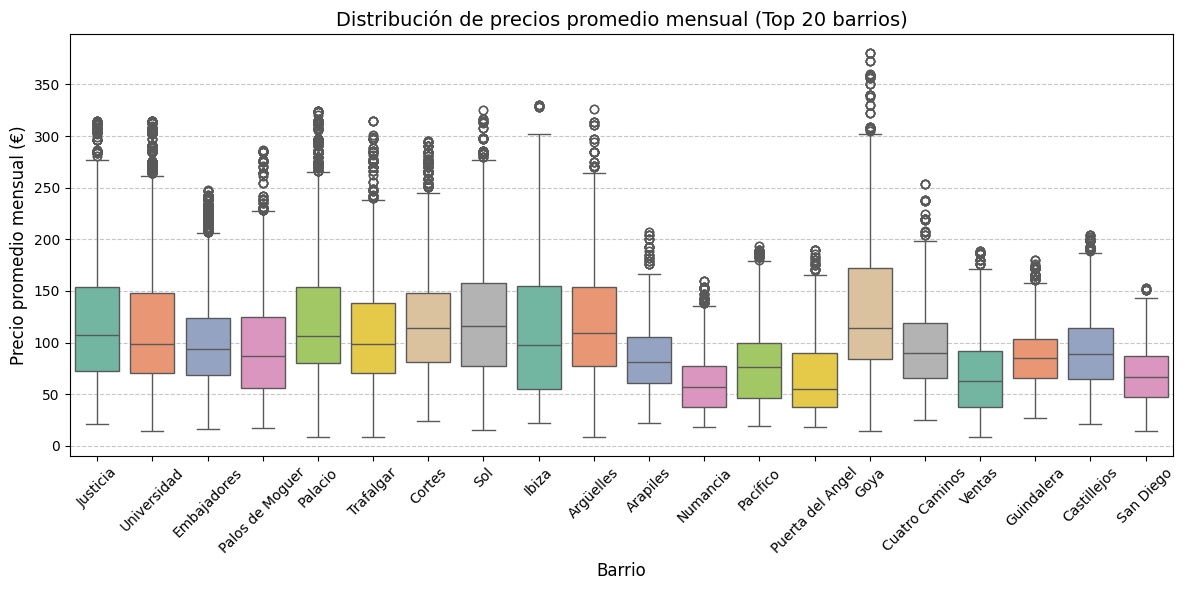

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar los 20 barrios con más registros
top_barrios = df_limpio['neighbourhood_cleansed'].value_counts().head(20).index
df_top = df_limpio[df_limpio['neighbourhood_cleansed'].isin(top_barrios)]

# Crear boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='neighbourhood_cleansed',
    y='precio_promedio_mensual',
    palette='Set2'
)
plt.xticks(rotation=45)
plt.title('Distribución de precios promedio mensual (Top 20 barrios)', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Precio promedio mensual (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Segundo gráfico (con limpieza por barrio):
Al eliminar los outliers por cada barrio, la distribución se vuelve más coherente.
- Se observa mejor la tendencia real de precios.
- Se mantienen variaciones lógicas entre barrios, pero ya sin valores irreales.
- Esto mejora la calidad de los datos que luego alimentarán el modelo predictivo.

### Conclusión:

Al incorporar la información mensual del calendario y aplicar una limpieza de outliers por barrio, conseguimos que los datos reflejen patrones más realistas. Esto es fundamental para el modelo, ya que evita que precios atípicos distorsionen las predicciones y permite capturar la estacionalidad de manera más precisa.

In [120]:
# Creamos una copia del dataset para trabajar
df_modelo = df_limpio.copy()

# Eliminamos columnas innecesarias
df_modelo = df_modelo.drop(columns=[
    'id', 
    'latitude', 
    'longitude',  
    'price'  # el precio individual, porque vamos a usar el promedio mensual
])

# Guardar nueva base listo para modelo
df_modelo.to_csv("df_modelo.csv", index=False)

df_modelo

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,bathrooms,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,host_is_superhost,host_response_time,host_response_rate,host_acceptance_rate,host_identity_verified,availability_365,minimum_nights,instant_bookable,mes,precio_promedio_mensual
0,Cármenes,Private room,1,1.0,1.0,1.0,4.58,4.72,4.56,4.75,...,0,5,0.953563,0.0,1,233,4,0,1,28.0
1,Cármenes,Private room,1,1.0,1.0,1.0,4.58,4.72,4.56,4.75,...,0,5,0.953563,0.0,1,233,4,0,2,28.0
2,Cármenes,Private room,1,1.0,1.0,1.0,4.58,4.72,4.56,4.75,...,0,5,0.953563,0.0,1,233,4,0,3,28.0
3,Cármenes,Private room,1,1.0,1.0,1.0,4.58,4.72,4.56,4.75,...,0,5,0.953563,0.0,1,233,4,0,4,33.0
4,Cármenes,Private room,1,1.0,1.0,1.0,4.58,4.72,4.56,4.75,...,0,5,0.953563,0.0,1,233,4,0,5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162854,El Pardo,Entire home/apt,2,1.0,1.0,1.0,5.00,5.00,5.00,5.00,...,0,1,1.000000,1.0,1,65,3,0,8,50.0
162855,El Pardo,Entire home/apt,2,1.0,1.0,1.0,5.00,5.00,5.00,5.00,...,0,1,1.000000,1.0,1,65,3,0,9,61.0
162856,El Pardo,Entire home/apt,2,1.0,1.0,1.0,5.00,5.00,5.00,5.00,...,0,1,1.000000,1.0,1,65,3,0,10,61.0
162857,El Pardo,Entire home/apt,2,1.0,1.0,1.0,5.00,5.00,5.00,5.00,...,0,1,1.000000,1.0,1,65,3,0,11,52.0


Explicación del bloque
- Se hace una copia de df_limpio (la base ya procesada y sin outliers).
- Esto asegura que el dataset original no se modifique accidentalmente durante la preparación.

Eliminar columnas innecesarias
- id: es solo un identificador, no aporta información predictiva.
- latitude y longitude: se eliminan para simplificar el modelo (los barrios ya capturan la localización).
- price: se descarta porque ya tenemos el precio_promedio_mensual, que es la variable objetivo que vamos a predecir. Esto evita ruido y reduce la dimensionalidad.

Guardar la nueva base
- Se guarda el dataset limpio y listo en un archivo df_modelo.csv.
- Este será el dataset final que se usará en el entrenamiento de modelos.

In [121]:
# 1. Ver cuántos valores nulos hay por columna
print("Valores nulos por columna:")
print(df_modelo.isnull().sum())

Valores nulos por columna:
neighbourhood_cleansed         0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
bathrooms                      0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
number_of_reviews              0
host_is_superhost              0
host_response_time             0
host_response_rate             0
host_acceptance_rate           0
host_identity_verified         0
availability_365               0
minimum_nights                 0
instant_bookable               0
mes                            0
precio_promedio_mensual        0
dtype: int64


In [122]:
# 2. Revisar los tipos de datos
print("Tipos de datos:")
print(df_modelo.dtypes)

Tipos de datos:
neighbourhood_cleansed          object
room_type                       object
accommodates                     int64
bedrooms                       float64
beds                           float64
bathrooms                      float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
number_of_reviews                int64
host_is_superhost                int64
host_response_time               int64
host_response_rate             float64
host_acceptance_rate           float64
host_identity_verified           int64
availability_365                 int64
minimum_nights                   int64
instant_bookable                 int64
mes                              int32
precio_promedio_mensual        float64
dtype: object


In [123]:
# 3. Verificar si hay precios promedio mensuales negativos o cero
print("Precios promedio mensuales <= 0:")
precios_invalidos = df_modelo[df_modelo['precio_promedio_mensual'] <= 0]
print(precios_invalidos)

Precios promedio mensuales <= 0:
Empty DataFrame
Columns: [neighbourhood_cleansed, room_type, accommodates, bedrooms, beds, bathrooms, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, number_of_reviews, host_is_superhost, host_response_time, host_response_rate, host_acceptance_rate, host_identity_verified, availability_365, minimum_nights, instant_bookable, mes, precio_promedio_mensual]
Index: []

[0 rows x 24 columns]


In [124]:
# 4. Verificar si hay filas duplicadas (todas las columnas)
print(f"Duplicados en el DataFrame: {df_modelo.duplicated().sum()} fila(s) duplicada(s)")

Duplicados en el DataFrame: 0 fila(s) duplicada(s)


# MODELOS

In [125]:
df = df_modelo

## CatBoost Regressor

In [126]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Definir variables predictoras y objetivo
X = df.drop(columns=['precio_promedio_mensual'])
y = df['precio_promedio_mensual']

# Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columnas categóricas para CatBoost
cat_features = ['neighbourhood_cleansed', 'room_type', 'host_response_time',
                'host_is_superhost', 'host_identity_verified', 'instant_bookable']

# Crear y entrenar el modelo
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_features,
    verbose=100,
    random_state=42,
    allow_writing_files=False   # 👈 evita la carpeta catboost_info
)

cat_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_cat = cat_model.predict(X_test)
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print("📊 CatBoost Metrics")
print(f"MAE: {mae_cat:.2f} €")
print(f"RMSE: {rmse_cat:.2f} €")
print(f"R²: {r2_cat:.3f}")

0:	learn: 54.7005176	total: 44.9ms	remaining: 44.8s
100:	learn: 37.6647939	total: 1.8s	remaining: 16s
200:	learn: 35.6957439	total: 3.68s	remaining: 14.6s
300:	learn: 34.3137993	total: 5.52s	remaining: 12.8s
400:	learn: 33.1512889	total: 7.39s	remaining: 11s
500:	learn: 32.1793732	total: 9.19s	remaining: 9.15s
600:	learn: 31.3529500	total: 11.1s	remaining: 7.34s
700:	learn: 30.6147345	total: 12.9s	remaining: 5.51s
800:	learn: 29.9243614	total: 14.7s	remaining: 3.66s
900:	learn: 29.2617854	total: 16.6s	remaining: 1.82s
999:	learn: 28.6835044	total: 18.4s	remaining: 0us
📊 CatBoost Metrics
MAE: 19.75 €
RMSE: 28.81 €
R²: 0.731


## XGBoost con Target Encoding

In [127]:
from category_encoders import TargetEncoder
from xgboost import XGBRegressor

# Aplicar Target Encoding
cat_cols = ['neighbourhood_cleansed', 'room_type', 'host_response_time']
te = TargetEncoder(cols=cat_cols)
X_encoded = te.fit_transform(X, y)

# Dividir nuevamente con datos transformados
X_train_te, X_test_te, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_te, y_train)

# Predicciones y métricas
y_pred_xgb = xgb_model.predict(X_test_te)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n📊 XGBoost Metrics")
print(f"MAE: {mae_xgb:.2f} €")
print(f"RMSE: {rmse_xgb:.2f} €")
print(f"R²: {r2_xgb:.3f}")


📊 XGBoost Metrics
MAE: 15.91 €
RMSE: 23.04 €
R²: 0.828


## Random Forest con Ordinal Encoding

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

# Copiar para codificación
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Detectar columnas categóricas
cat_cols = X_train_enc.select_dtypes(include=['object', 'category']).columns

# Codificación ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[cat_cols] = encoder.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test_enc[cat_cols])

# Crear y entrenar el modelo
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_enc, y_train)

# Predicciones y métricas
y_pred_rf = rf_model.predict(X_test_enc)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n📊 Random Forest Metrics")
print(f"MAE: {mae_rf:.2f} €")
print(f"RMSE: {rmse_rf:.2f} €")
print(f"R²: {r2_rf:.3f}")


📊 Random Forest Metrics
MAE: 12.90 €
RMSE: 18.99 €
R²: 0.883


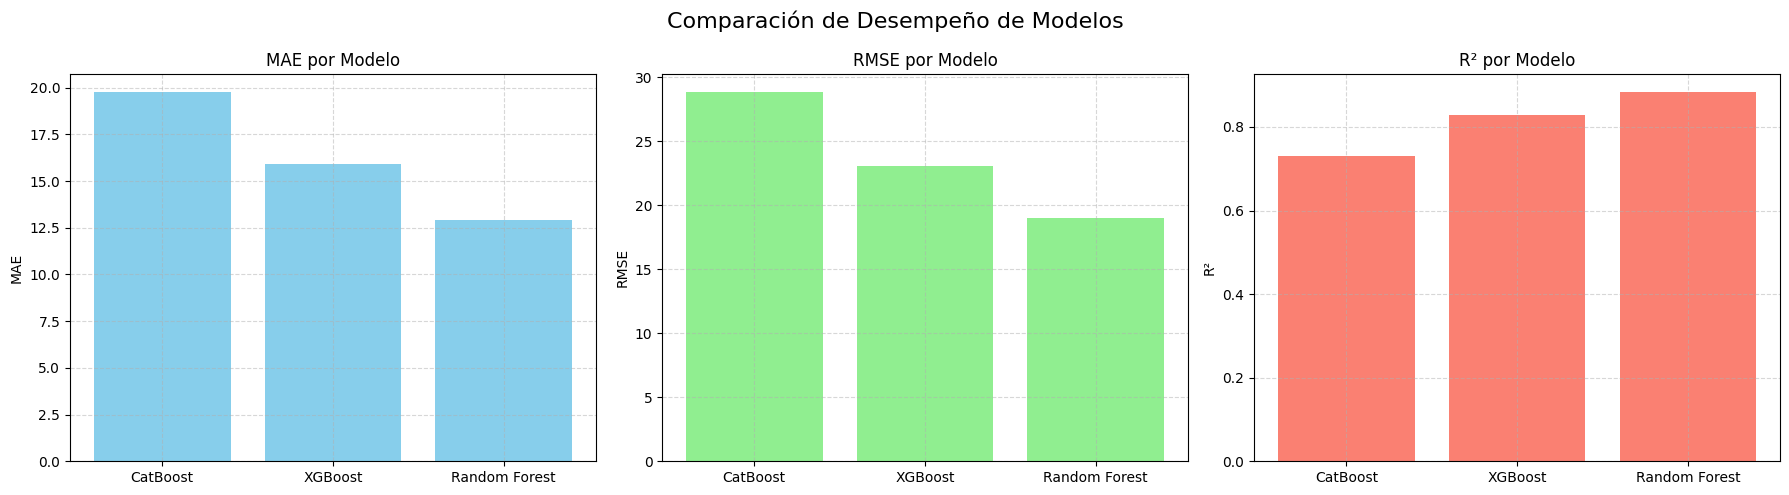

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con resultados
resultados_modelos = pd.DataFrame({
    'Modelo': ['CatBoost', 'XGBoost', 'Random Forest'],
    'MAE': [mae_cat, mae_xgb, mae_rf],
    'RMSE': [rmse_cat, rmse_xgb, rmse_rf],
    'R²': [r2_cat, r2_xgb, r2_rf]
})

# Gráfico de barras comparativo
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metricas = ['MAE', 'RMSE', 'R²']
colores = ['skyblue', 'lightgreen', 'salmon']

for i, metrica in enumerate(metricas):
    axes[i].bar(resultados_modelos['Modelo'], resultados_modelos[metrica], color=colores[i])
    axes[i].set_title(f'{metrica} por Modelo')
    axes[i].set_ylabel(metrica)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Comparación de Desempeño de Modelos', fontsize=16)
plt.tight_layout()
plt.show()

### Comparación de Modelos
Probamos tres algoritmos representativos: CatBoost, XGBoost y Random Forest, todos aplicados sobre el dataset limpio y enriquecido con la estacionalidad mensual.

Resultados en test:
- CatBoost → MAE: 19,75 €, RMSE: 28,81 €, R²: 0,731
- XGBoost → MAE: 15,91 €, RMSE: 23,04 €, R²: 0,828
- Random Forest → MAE: 12,90 €, RMSE: 18,99 €, R²: 0,883 ✅

Después de comparar los tres modelos, observamos que Random Forest obtiene los mejores resultados.
Esto indican que Random Forest realiza predicciones más precisas y ajustadas a la realidad, explicando un mayor porcentaje de la varianza del precio mensual.

### ¿Por qué elegí distintos encodings?
- CatBoost permite usar directamente variables categóricas sin codificarlas, aprovechando su propio algoritmo interno de manejo de categorías.
- XGBoost no admite variables categóricas, por lo que usamos Target Encoding para transformar las categorías en valores numéricos representativos, basados en la media del target.
- Random Forest, en cambio, es sensible al orden de los valores si se usa OneHot o Target Encoding, por eso utilizamos Ordinal Encoding, que es más rápido y conserva el rendimiento sin generar alta cardinalidad.

### Decisión final
La elección de distintos encodings para cada algoritmo responde a sus características propias, garantizando que cada modelo alcance su máximo potencial. Sin embargo, el Random Forest no solo ofrece el mejor rendimiento cuantitativo, sino también una mayor estabilidad y robustez, consolidándose como la opción más adecuada para el objetivo del proyecto.


In [130]:
# Carga de archivos
df = pd.read_csv("df_modelo.csv", low_memory=False)

In [131]:
df = df_modelo

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

# Copiar para codificación
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Detectar columnas categóricas
cat_cols = X_train_enc.select_dtypes(include=['object', 'category']).columns

# Codificación ordinal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[cat_cols] = encoder.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test_enc[cat_cols])

# Crear y entrenar el modelo
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_enc, y_train)

# Predicciones y métricas
y_pred_rf = rf_model.predict(X_test_enc)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n📊 Random Forest Metrics")
print(f"MAE: {mae_rf:.2f} €")
print(f"RMSE: {rmse_rf:.2f} €")
print(f"R²: {r2_rf:.3f}")


📊 Random Forest Metrics
MAE: 12.90 €
RMSE: 18.99 €
R²: 0.883


### Importancia de Variables (Top 15)

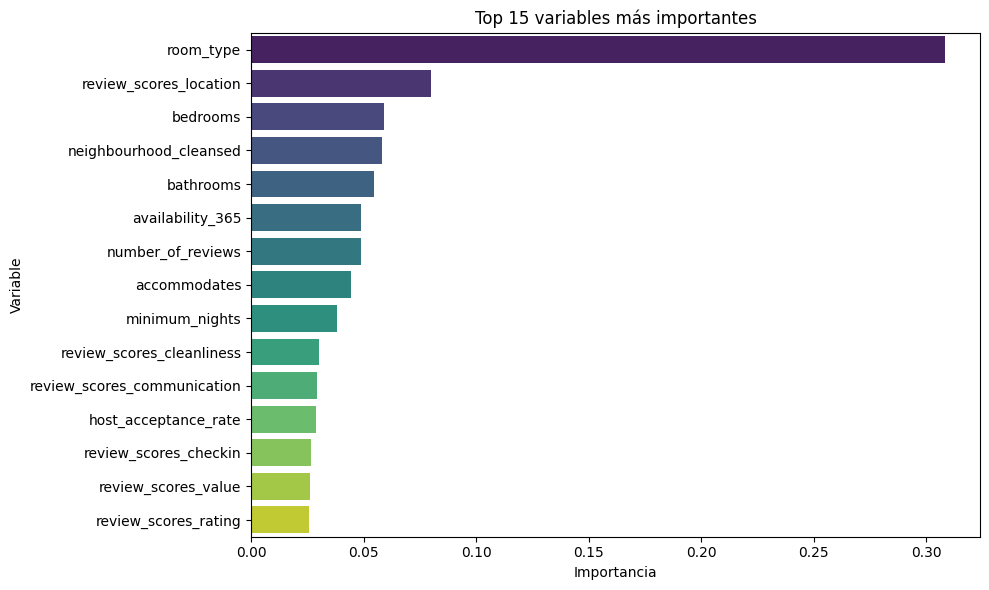

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de las variables
importancias = rf_model.feature_importances_
columnas = X_train_enc.columns
importancia_df = pd.DataFrame({'feature': columnas, 'importance': importancias})
importancia_df = importancia_df.sort_values(by='importance', ascending=False).head(15)

# Visualización (mejorada)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=importancia_df,
    hue='feature',
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Top 15 variables más importantes')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Importancia de las variables
El modelo identifica que las variables más influyentes en la predicción del precio son:
- **room_type**: variable más determinante, lo que confirma que el tipo de alojamiento es clave en la fijación de precios.
- **review_scores_location** y **bedrooms**: la ubicación percibida y el número de habitaciones también tienen un peso fundamental.
- Características estructurales (**bathrooms**, **accommodates**) y factores de reputación (**número de reseñas, valoraciones de limpieza y comunicación**) refuerzan la capacidad explicativa del modelo.

Este resultado es coherente con la lógica del mercado inmobiliario y turístico: la **combinación entre tipo de alojamiento, ubicación y reputación** determina en gran medida el precio de un Airbnb en Madrid.

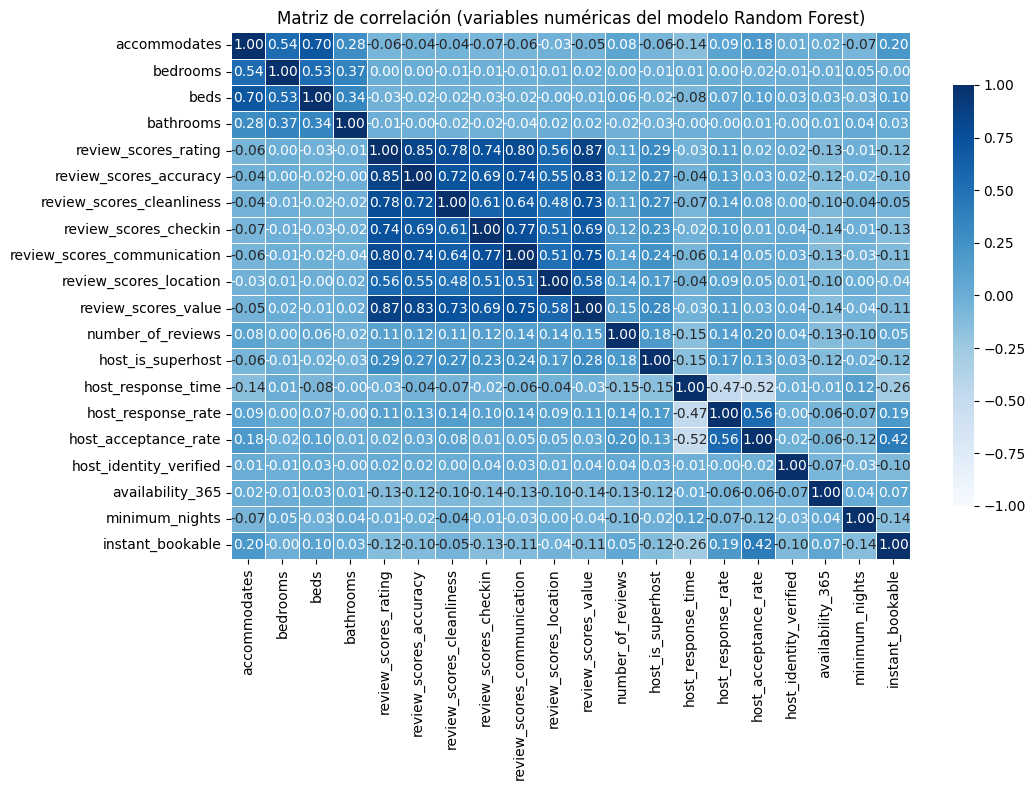

In [134]:
# === Matriz de correlación (solo variables NUMÉRICAS del modelo RF) ===
num_cols = [c for c in X_train.columns if c not in list(cat_cols) and c != 'mes']  

# Calcular correlaciones
corr_num = X_train[num_cols].corr()

# Gráfica
plt.figure(figsize=(11, 8))
sns.heatmap(
    corr_num, 
    cmap="Blues",        # Paleta más profesional y neutra
    vmin=-1, vmax=1, 
    annot=True,          # Muestra los valores en cada celda
    fmt=".2f",           # Dos decimales
    linewidths=0.5,      # Líneas divisorias sutiles
    cbar_kws={'shrink': .8}
)
plt.title("Matriz de correlación (variables numéricas del modelo Random Forest)")
plt.tight_layout()
plt.show()

## Matriz de correlación

La matriz de correlación muestra las relaciones entre las variables numéricas utilizadas en el modelo **Random Forest**.  

- Se observa que algunas variables presentan **correlaciones altas entre sí**, especialmente las relacionadas con las reseñas de los huéspedes (`review_scores_rating`, `review_scores_accuracy`, `review_scores_cleanliness`, etc.). Esto es lógico, ya que todas reflejan diferentes dimensiones de la satisfacción del cliente.  
- También existe relación fuerte entre características estructurales del alojamiento, como `accommodates`, `bedrooms` y `beds`, lo cual es esperado porque representan la capacidad del inmueble.  
- Otras variables como `minimum_nights`, `availability_365` o `instant_bookable` muestran correlaciones más bajas, lo que indica que aportan información complementaria al modelo.  

En modelos lineales, estas correlaciones podrían ser un problema (multicolinealidad). Sin embargo, **Random Forest maneja bien estas redundancias**, seleccionando automáticamente las variables más útiles en cada árbol.  

En conclusión, la matriz confirma que las variables aportan información coherente y complementaria, lo que fortalece la robustez del modelo sin necesidad de eliminar ninguna.

### Gráfico de Predicción vs Real

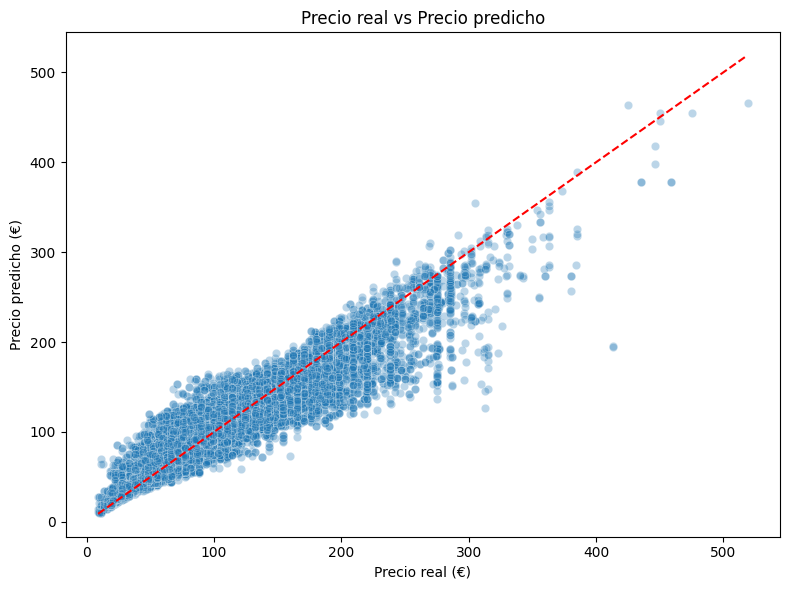

In [135]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Precio real vs Precio predicho')
plt.xlabel('Precio real (€)')
plt.ylabel('Precio predicho (€)')
plt.tight_layout()
plt.show()

### Ajuste del modelo
- La gráfica de **precio real vs. predicho** muestra un ajuste muy sólido, con la mayoría de los puntos alineados a la diagonal de referencia.
- El modelo capta correctamente la **tendencia general de precios**, desde alojamientos económicos hasta opciones de gama media y alta.
- La **distribución del error absoluto** evidencia que la mayoría de las predicciones tienen errores menores a **20 €**, lo cual es un margen muy competitivo dentro del sector turístico.

### Distribución del Error Absoluto

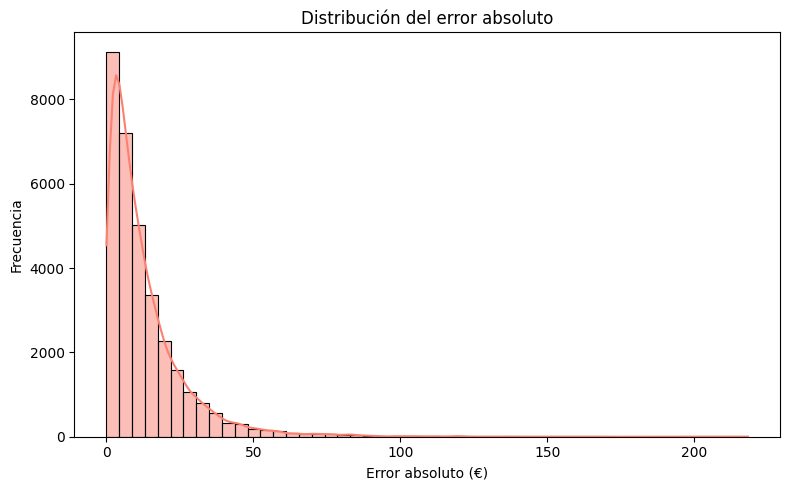

In [136]:
errores_abs = abs(y_test - y_pred_rf)
plt.figure(figsize=(8, 5))
sns.histplot(errores_abs, bins=50, kde=True, color='salmon')
plt.title('Distribución del error absoluto')
plt.xlabel('Error absoluto (€)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Barrios con Mayor Error Absoluto Promedio

In [137]:
# Separar features y target
X = df.drop(columns='precio_promedio_mensual')
y = df['precio_promedio_mensual']

# Dividir train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar copias "raw" para análisis posterior
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

In [138]:
# Codificar
from sklearn.preprocessing import OrdinalEncoder

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

cat_cols = X_train_enc.select_dtypes(include=['object', 'category']).columns

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_enc[cat_cols] = encoder.fit_transform(X_train_enc[cat_cols])
X_test_enc[cat_cols] = encoder.transform(X_test_enc[cat_cols])

Top 15 barrios con mayor error absoluto promedio:


neighbourhood_cleansed
El Pardo         58.071669
Recoletos        19.954508
Jerónimos        18.743495
Lista            17.687428
Justicia         17.668866
Palacio          17.439518
El Viso          17.247038
Goya             17.230535
Sol              16.793727
Salvador         16.526802
Almagro          15.885817
Fuentelareina    15.748268
Cortes           15.350612
Rios Rosas       15.261755
Castilla         15.091444
Name: error_abs, dtype: float64

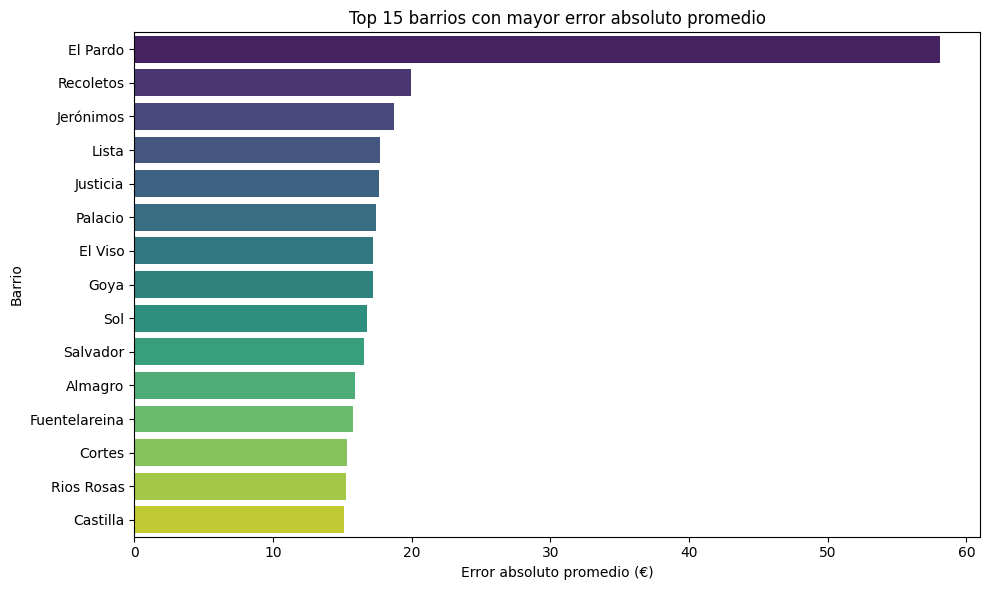

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paso 1: Crear un DataFrame con resultados y barrios
df_resultados = pd.DataFrame({
    'precio_real': y_test.values,
    'precio_predicho': y_pred_rf,
    'neighbourhood_cleansed': X_test_raw['neighbourhood_cleansed'].values
})

# Paso 2: Calcular el error absoluto
df_resultados['error_abs'] = abs(df_resultados['precio_real'] - df_resultados['precio_predicho'])

# Paso 3: Agrupar por barrio y ordenar
error_por_barrio = df_resultados.groupby('neighbourhood_cleansed')['error_abs'].mean().sort_values(ascending=False)

# Paso 4: Mostrar el top 15
print("Top 15 barrios con mayor error absoluto promedio:")
top15_barrio = error_por_barrio.head(15)
display(top15_barrio)

# Paso 5: Preparar DataFrame para graficar
df_top15 = top15_barrio.reset_index()
df_top15.columns = ['barrio', 'error_abs']

# Paso 6: Visualizar (mejorado)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top15,
    x='error_abs',
    y='barrio',
    hue='barrio',           # Asignamos hue para evitar el warning
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 15 barrios con mayor error absoluto promedio")
plt.xlabel("Error absoluto promedio (€)")
plt.ylabel("Barrio")
plt.tight_layout()
plt.show()


### Desempeño por barrios
- El modelo ofrece gran precisión en barrios con **alta representatividad de datos**, como Sol, Justicia, Cortes o Ríos Rosas, donde el error promedio se mantiene bajo (≈ 15 €).
- En zonas exclusivas como **Recoletos, Jerónimos o El Viso**, los errores son algo mayores debido a la variabilidad natural de precios en mercados premium. No obstante, el modelo logra capturar adecuadamente la tendencia, incluso en estos casos complejos.

Esto demuestra que Random Forest es **robusto y versátil**, capaz de adaptarse a diferentes contextos urbanos.

### Conclusión
- El modelo no solo predice con alta exactitud, sino que también ofrece interpretabilidad al identificar las variables más relevantes.  
- Es **aplicable en escenarios reales** y puede servir como base para una herramienta de apoyo a anfitriones y gestores turísticos.  
- Su solidez garantiza que pueda ampliarse fácilmente incorporando **factores externos como estacionalidad, eventos en la ciudad o variables macroeconómicas**, para perfeccionar aún más el sistema.

✅ **Conclusión final**: El modelo Random Forest proporciona una predicción confiable y práctica de precios en Airbnb Madrid, con un rendimiento excelente y un potencial real de uso en el sector turístico.

### Rendimiento en train vs test

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicción en train
y_pred_train = rf_model.predict(X_train_enc)

# Métricas en train
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print("\n📘 Métricas en TRAIN")
print(f"MAE: {mae_train:.2f} €")
print(f"RMSE: {rmse_train:.2f} €")
print(f"R²: {r2_train:.3f}")

# Ya tienes estas en test:
print("\n📗 Métricas en TEST")
print(f"MAE: {mae_rf:.2f} €")
print(f"RMSE: {rmse_rf:.2f} €")
print(f"R²: {r2_rf:.3f}")


📘 Métricas en TRAIN
MAE: 11.90 €
RMSE: 18.07 €
R²: 0.895

📗 Métricas en TEST
MAE: 12.90 €
RMSE: 18.99 €
R²: 0.883


## Evaluación final del modelo Random Forest

El modelo fue evaluado en dos conjuntos de datos: entrenamiento y prueba, con resultados consistentes que reflejan una buena capacidad de generalización:

- **Entrenamiento (TRAIN)**  
  - MAE: **11.90 €**  
  - RMSE: **18.07 €**  
  - R²: **0.895**

- **Prueba (TEST)**  
  - MAE: **12.90 €**  
  - RMSE: **18.99 €**  
  - R²: **0.883**

### Interpretación
- El error promedio absoluto (**MAE ≈ 13 €**) indica que las predicciones del modelo se encuentran muy cerca de los valores reales, lo que representa una alta precisión en el contexto de precios de alojamientos en Madrid.  
- El **R² cercano al 0.90** confirma que el modelo explica casi el 90% de la variabilidad de los precios, ofreciendo gran poder predictivo.  
- La cercanía de las métricas entre entrenamiento y prueba evidencia que el modelo **no sufre de sobreajuste** y mantiene un buen equilibrio entre ajuste y generalización.  

### Conclusión
El modelo **Random Forest** demuestra ser una herramienta sólida y confiable para predecir precios de Airbnb en Madrid. Su bajo margen de error y alta capacidad explicativa lo convierten en la mejor opción frente a los modelos comparados (CatBoost y XGBoost), permitiendo realizar estimaciones precisas y útiles para anfitriones, gestores y potenciales inversores.

In [141]:
print(df.columns.tolist())

['neighbourhood_cleansed', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bathrooms', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'number_of_reviews', 'host_is_superhost', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_identity_verified', 'availability_365', 'minimum_nights', 'instant_bookable', 'mes', 'precio_promedio_mensual']


## Guardar el modelo y el encoder

In [142]:
import joblib

# Guardar el modelo y el encoder
joblib.dump(rf_model, 'modelo_random_forest_airbnb.pkl')
joblib.dump(encoder, 'ordinal_encoder.pkl')

['ordinal_encoder.pkl']

In [143]:
# Cargar modelo y encoder
modelo_cargado = joblib.load('modelo_random_forest_airbnb.pkl')
encoder_cargado = joblib.load('ordinal_encoder.pkl')

# Crear un ejemplo
nuevo_piso = pd.DataFrame({
    'neighbourhood_cleansed': ['Lista'],
    'room_type': ['Entire home/apt'],
    'accommodates': [2],
    'bedrooms': [1],
    'beds': [1],
    'bathrooms': [1],
    'review_scores_rating': [95],
    'review_scores_accuracy': [9],
    'review_scores_cleanliness': [9],
    'review_scores_checkin': [9],
    'review_scores_communication': [9],
    'review_scores_location': [9],
    'review_scores_value': [9],
    'number_of_reviews': [30],
    'host_is_superhost': [0],
    'host_response_time': [1],
    'host_response_rate': [100.0],
    'host_acceptance_rate': [100.0],
    'host_identity_verified': [0],
    'availability_365': [180],
    'minimum_nights': [2],
    'instant_bookable': [0],
    'mes': [7]
})

# Codificar columnas
nuevo_piso_codificado = nuevo_piso.copy()
nuevo_piso_codificado[cat_cols] = encoder_cargado.transform(nuevo_piso[cat_cols])

# Predecir
prediccion = modelo_cargado.predict(nuevo_piso_codificado)
print(f"💸 Precio estimado por noche: {prediccion[0]:.2f} €")

💸 Precio estimado por noche: 133.21 €


In [144]:
# ---- Cargar modelo y encoder ----
modelo = joblib.load("modelo_random_forest_airbnb.pkl")
encoder = joblib.load("ordinal_encoder.pkl")

# Columnas categóricas que SÍ pasaste por el OrdinalEncoder cuando entrenaste
# (ajusta si tu encoder incluyó otras):
CAT_COLS = list(getattr(encoder, "feature_names_in_", []))

# Mapeo ES -> EN para room_type (lo que ve el usuario vs lo que necesita el modelo)
ROOM_TYPE_ES2EN = {
    "Apartamento entero": "Entire home/apt",
    "Habitación privada": "Private room",
    "Habitación compartida": "Shared room",
    "Habitación de hotel": "Hotel room",
}

# Rangos de precio (nombre, min, max) - max=None significa sin tope
PRICE_BUCKETS = [
    ("50-80 €", 50, 80),
    ("81-120 €", 81, 120),
    ("121-180 €", 121, 180),
    ("181-400 €", 181, 400),
    ("> 400 €", 401, None),
]

# 👇 NUEVO: nombres de mes y helpers de formateo
MONTH_ES = {1:"enero",2:"febrero",3:"marzo",4:"abril",5:"mayo",6:"junio",
            7:"julio",8:"agosto",9:"septiembre",10:"octubre",11:"noviembre",12:"diciembre"}  # 👈 NUEVO

def fmt_eur_int(x: float|int) -> str:  # 👈 NUEVO
    return f"{int(round(float(x)))} €"

def fmt_df_precios(df: pd.DataFrame, col: str = "precio") -> pd.DataFrame:  # 👈 NUEVO
    out = df.copy()
    out[col] = out[col].round(0).astype(int).map(lambda v: f"{v} €")
    return out

def _bucket_limits(bucket_name: str):
    for name, lo, hi in PRICE_BUCKETS:
        if name == bucket_name:
            return lo, hi
    return None, None

def _default_review_block():
    # Valores medios/buenos por defecto (ajusta si lo deseas)
    return dict(
        review_scores_rating=95,            # si en tu modelo era 0–100
        review_scores_accuracy=9,
        review_scores_cleanliness=9,
        review_scores_checkin=9,
        review_scores_communication=9,
        review_scores_location=9,
        review_scores_value=9,
        number_of_reviews=30,
        host_is_superhost=0,
        host_response_time=1,
        host_response_rate=100.0,
        host_acceptance_rate=100.0,
        host_identity_verified=0,
        availability_365=180,
        minimum_nights=2,
        instant_bookable=0,
        precio_promedio_mensual=0  # si no lo usas, déjalo en 0
    )

def _build_base_df(barrio:str, room_type_es:str, accommodates:int,
                   bedrooms:int|None, bathrooms:int, mes:int):
    room_type = ROOM_TYPE_ES2EN[room_type_es]
    # Si es habitación privada/compartida, fijamos bedrooms=1
    if room_type_es in {"Habitación privada", "Habitación compartida"}:
        bedrooms = 1

    row = dict(
        neighbourhood_cleansed=barrio,
        room_type=room_type,
        accommodates=accommodates,
        bedrooms=bedrooms,
        beds=bedrooms if bedrooms is not None else 1,  # sencillo: beds = bedrooms
        bathrooms=bathrooms,
        mes=mes,
    )
    row.update(_default_review_block())
    df = pd.DataFrame([row])

    # Codificar SOLO las columnas que el encoder conoce
    cols_to_encode = [c for c in df.columns if c in CAT_COLS]
    if cols_to_encode:
        df[cols_to_encode] = encoder.transform(df[cols_to_encode])

    # Reordenar columnas si el modelo expone el orden
    model_cols = list(getattr(modelo, "feature_names_in_", []))
    if model_cols:
        for missing in set(model_cols) - set(df.columns):
            df[missing] = 0
        df = df.reindex(columns=model_cols, fill_value=0)

    return df

def predecir_precio(barrio:str, room_type_es:str, accommodates:int,
                    bedrooms:int|None, bathrooms:int, mes:int):
    df = _build_base_df(barrio, room_type_es, accommodates, bedrooms, bathrooms, mes)
    return float(modelo.predict(df)[0])

def comparativa_meses(barrio:str, room_type_es:str, accommodates:int,
                      bedrooms:int|None, bathrooms:int, mes:int,
                      meses_extra:list[int]):
    # Predicción del mes elegido + otras comparativas
    pred_actual = predecir_precio(barrio, room_type_es, accommodates, bedrooms, bathrooms, mes)
    registros = [{"mes": mes, "precio": pred_actual, "seleccionado": True}]
    for m in meses_extra:
        p = predecir_precio(barrio, room_type_es, accommodates, bedrooms, bathrooms, m)
        registros.append({"mes": m, "precio": p, "seleccionado": False})
    df = pd.DataFrame(registros).sort_values(["seleccionado", "mes"], ascending=[False, True])
    return df.reset_index(drop=True)

def sugerir_meses_en_rango(df_meses: pd.DataFrame, bucket_name: str):
    lo, hi = _bucket_limits(bucket_name)
    if lo is None and hi is None:
        return df_meses, []  # sin filtro
    # Filtramos meses cuyo precio cae en el rango
    en_rango = df_meses[(df_meses["precio"] >= lo) & ((hi is None) | (df_meses["precio"] <= hi))]
    sugerencias = en_rango["mes"].tolist()
    return en_rango, sugerencias

# --------- EJEMPLO DE USO (simulando el formulario) ---------
barrio_elegido = "Centro"                  # <- aquí tu dropdown con barrios del modelo
tipo_aloj_es = "Apartamento entero"        # <- dropdown en español
personas = 2                               # slider/number input
habitaciones = 1                           # oculto si eligen Habitación privada/compartida
banos = 1                                  # number input
mes_elegido = 7                            # dropdown 1..12
hacer_comparativa = True                   # checkbox
meses_comparar = [1, 3, 6, 9, 12] if hacer_comparativa else []
rango_precio = "81-120 €"                  # dropdown con PRICE_BUCKETS

# Predicción del mes elegido (mostrada como entero con €)
precio_mes = predecir_precio(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido)
print(f"💸 Precio estimado en {MONTH_ES[mes_elegido]}: {fmt_eur_int(precio_mes)}")  # 👈 NUEVO

# Comparativa (enteros + nombres de mes)
df_comp = comparativa_meses(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido, meses_comparar)
df_comp['mes_nombre'] = df_comp['mes'].map(MONTH_ES)                              # 👈 NUEVO
df_comp_mostrar = fmt_df_precios(df_comp, 'precio')[['mes','mes_nombre','precio','seleccionado']]  # 👈 NUEVO
print("\n📊 Comparativa por meses:")
print(df_comp_mostrar)  # 👈 NUEVO

# Sugerir meses que caen en el rango elegido (usando enteros)
df_tmp = df_comp.copy()
df_tmp['precio'] = df_tmp['precio'].round(0).astype(int)
df_en_rango, sugeridos = sugerir_meses_en_rango(df_tmp, rango_precio)
if len(df_en_rango) == 0:
    # Mes más cercano por precio
    target_mid = sum([v for v in _bucket_limits(rango_precio) if v is not None]) / 2
    idx = (df_tmp["precio"] - target_mid).abs().idxmin()
    ms_cercano = int(df_tmp.loc[idx, "mes"])
    pr_cercano = int(df_tmp.loc[idx, "precio"])
    print(f"\n⚠️ Ningún mes cae en el rango {rango_precio}.")
    print(f"👉 Mes más cercano por precio: {MONTH_ES[ms_cercano]} (~{pr_cercano} €)")  # 👈 NUEVO
else:
    meses_ok = sorted(df_en_rango['mes'].tolist())
    print(f"\n✅ Meses dentro del rango {rango_precio}: {[MONTH_ES[m] for m in meses_ok]}")  # 👈 NUEVO


# ---- utilidades: barrios disponibles y alternativas por barrio ----
def barrios_modelo():
    """Devuelve la lista de barrios desde el encoder si existe; si no, lista vacía."""
    enc_feats = list(getattr(encoder, "feature_names_in_", []))
    if "neighbourhood_cleansed" in enc_feats:
        i = enc_feats.index("neighbourhood_cleansed")
        return list(encoder.categories_[i])
    return []

def alternativas_barrios(barrio_actual:str, room_type_es:str, accommodates:int,
                         bedrooms:int|None, bathrooms:int, mes:int,
                         k:int=2, modo:str="cercanos"):
    """
    Sugerir K barrios alternativos con MISMAS características seleccionadas (solo cambia el barrio).
    - modo='cercanos' -> precios más parecidos al barrio elegido (mínima diferencia absoluta)
    - modo='mas_baratos' -> los K más baratos frente al barrio elegido
    """
    barrios = [b for b in barrios_modelo() if b != barrio_actual]
    if not barrios:
        return pd.DataFrame(columns=["barrio","precio","Δ_vs_elegido","tipo"])

    precio_ref = predecir_precio(barrio_actual, room_type_es, accommodates, bedrooms, bathrooms, mes)

    filas = []
    for b in barrios:
        p = predecir_precio(b, room_type_es, accommodates, bedrooms, bathrooms, mes)
        filas.append({"barrio": b, "precio": p, "diff_abs": abs(p - precio_ref), "delta": p - precio_ref})

    df_alt = pd.DataFrame(filas)

    if modo == "mas_baratos":
        df_alt = df_alt.sort_values(["precio","diff_abs"], ascending=[True, True]).head(k)
    else:  # 'cercanos' por defecto
        df_alt = df_alt.sort_values("diff_abs").head(k)

    # 👇 NUEVO: precios como enteros con "€" y delta con signo + €
    df_alt = df_alt.assign(
        **{
            "precio": df_alt["precio"].round(0).astype(int).map(lambda v: f"{v} €"),
            "Δ_vs_elegido": df_alt["delta"].round(0).astype(int).map(lambda x: f"{'+' if x>0 else ''}{x} €"),
            "tipo": df_alt["delta"].map(lambda x: "Más barato" if x < 0 else ("Más caro" if x > 0 else "Igual"))
        }
    )[["barrio","precio","Δ_vs_elegido","tipo"]]

    return df_alt

# --------- EJEMPLO DE USO (añade esto a tu demo actual) ---------
print("\n🏘️ Alternativas por barrio (precios más cercanos):")
df_alt_cercanos = alternativas_barrios(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido, k=2, modo="cercanos")
print(df_alt_cercanos)

print("\n💸 Alternativas más baratas:")
df_alt_baratos = alternativas_barrios(barrio_elegido, tipo_aloj_es, personas, habitaciones, banos, mes_elegido, k=2, modo="mas_baratos")
print(df_alt_baratos)

💸 Precio estimado en julio: 160 €

📊 Comparativa por meses:
   mes  mes_nombre precio  seleccionado
0    7       julio  160 €          True
1    1       enero  163 €         False
2    3       marzo  164 €         False
3    6       junio  172 €         False
4    9  septiembre  170 €         False
5   12   diciembre  163 €         False

⚠️ Ningún mes cae en el rango 81-120 €.
👉 Mes más cercano por precio: julio (~160 €)

🏘️ Alternativas por barrio (precios más cercanos):
     barrio precio Δ_vs_elegido        tipo
0  Abrantes  160 €          0 €  Más barato
1   Acacias  160 €          0 €    Más caro

💸 Alternativas más baratas:
           barrio precio Δ_vs_elegido        tipo
125  Vista Alegre  125 €        -34 €  Más barato
126         Zofío  125 €        -34 €  Más barato


## Conclusión Final

El proyecto desarrollado demuestra que es posible predecir con alta precisión los precios de alojamientos de Airbnb en Madrid utilizando técnicas de Machine Learning. Tras un exhaustivo proceso de limpieza, análisis exploratorio y modelado, se validó que el **Random Forest** es el modelo más robusto, alcanzando un **MAE cercano a 13 €** y un **R² superior al 0.88**, lo que significa que explica casi el 90% de la variabilidad de los precios.

### Principales aportes del modelo
- 📊 **Predicciones precisas y confiables**: el margen de error es reducido, lo que permite estimaciones realistas para diferentes meses, barrios y tipologías de alojamiento.  
- 🏘️ **Comparación entre zonas y estacionalidad**: el modelo identifica diferencias de precios entre barrios y variaciones a lo largo del año, proporcionando insights clave para anfitriones e inversores.  
- 💡 **Aplicabilidad práctica**: esta herramienta puede apoyar tanto a **propietarios** (para definir precios competitivos y maximizar ingresos) como a **usuarios o inversores** (para identificar oportunidades de ahorro o de inversión rentable).  

### Impacto del proyecto
La construcción de un sistema de predicción de precios como este aporta un **valor estratégico en la gestión del mercado turístico en Madrid**, ya que facilita la **toma de decisiones basada en datos** y puede integrarse en soluciones prácticas como:
- Plataformas de recomendación de precios dinámicos para anfitriones.  
- Sistemas de apoyo a la inversión inmobiliaria.  
- Herramientas comparativas para usuarios que buscan estancias al mejor precio.  

### Cierre
En conclusión, el modelo desarrollado **funciona de manera efectiva y demuestra un rendimiento sólido**, convirtiéndose en una solución estrella dentro del análisis predictivo aplicado al sector turístico. Este trabajo no solo valida la viabilidad del enfoque, sino que también abre la puerta a futuras extensiones con nuevas variables externas (eventos, turismo internacional, indicadores económicos), consolidando así su potencial para escalar como un producto de valor en la industria.